<a href="https://colab.research.google.com/github/hgabrali/Hands-on-Mini-Project-Feature-Preparation-on-the-Adult-Income-Dataset/blob/main/Exercise_Feature_Preparation_on_the_Adult_Income_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 Week 1: Intro to Machine Learning & Data Preparation 🛠️

[MS Materials: Features Preparation](https://colab.research.google.com/drive/1XZskClkoO2iTmbz3fc__isJf59jSSvtb)


[Hands-on-Mini-Project-Feature-Preparation-on-the-Adult-Income-Dataset](https://github.com/hgabrali/Hands-on-Mini-Project-Feature-Preparation-on-the-Adult-Income-Dataset/tree/main)

## Exercise: Feature Preparation on the Adult Income Dataset 💰

We'll now practice everything we've learned (Steps 1–5) on a new dataset: **The UCI Adult Income Dataset (Census Income)**.

**Goal:** Predict whether a person earns **>50K** or **<=50K** per year.

## About the Dataset

* **Size:** ~32,000 rows, 15 columns.
* **Target column:** `income` ( **>50K** or **<=50K** ).
* Missing values are represented by **" ?"** so we will replace them with null values as we read the dataset.

Here is how to load the data:

["Census Income" dataset](https://archive.ics.uci.edu/dataset/2/adult)

In [32]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mtick
import matplotlib.lines as lines
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import warnings
warnings.filterwarnings('ignore')

In [4]:
pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

# New Information:

## ✅ Data Is Already Loaded and Clean!

The key thing to understand is that the **`fetch_ucirepo`** function has already done all the hard work for you:

1.  It automatically **loaded the data** (equivalent to your `pd.read_csv` command).
2.  It correctly handled the **column names** and the complex **separators**.
3.  Crucially, it usually handles the **missing values** (the `" ?"`) by converting them directly to **NaN** (Null) values, which is the required format for Pandas and scikit-learn.

### 🎯 How to Proceed (The Modern Way)

You have already executed the necessary loading steps. Here is how you now take the data and combine it into a single, usable DataFrame named **`df`** (similar to your previous `df_dropped` or `df_lr`), which is the standard starting point for preprocessing:

## Step 1: Combine Features (X) and Target (y)

First, let's combine the separate $\mathbf{X}$ (features) and $\mathbf{y}$ (target) DataFrames into one clean `df` so you can continue your preprocessing steps.

In [6]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# --- Data Loading (Already Done) ---
adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets

# --- New Step: Combine X and y into a single DataFrame (df) ---
# Reset the index of the target 'y' just to ensure clean concatenation
y.reset_index(drop=True, inplace=True)

# Concatenate X and y side-by-side (axis=1)
# This creates the standard working DataFrame 'df'
df = pd.concat([X, y], axis=1)

print("✅ Data successfully loaded and combined into 'df'.")
print("\nFirst 5 rows of the combined DataFrame:")
print(df.head())

✅ Data successfully loaded and combined into 'df'.

First 5 rows of the combined DataFrame:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174     

# 💻 Step 0: Initial Data Copy and Exploration

In [7]:
# Create a working copy of the loaded DataFrame
df_adult = df.copy()

print()

In [10]:
# 2. Structural Check: Data Types and Missing Values:
df_adult.info()

# Directly checking the total count of missing values per column
print("\n--- Missing Value Count ---")
print(df_adult.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB

--- Missing Value Count ---
age                 0
workclass         963
fnlwgt              

In [ ]:
# 3. Statistical Summary of Numeric Features:

In [11]:

print(df_adult.describe().T)

                  count           mean            std      min       25%  \
age             48842.0      38.643585      13.710510     17.0      28.0   
fnlwgt          48842.0  189664.134597  105604.025423  12285.0  117550.5   
education-num   48842.0      10.078089       2.570973      1.0       9.0   
capital-gain    48842.0    1079.067626    7452.019058      0.0       0.0   
capital-loss    48842.0      87.502314     403.004552      0.0       0.0   
hours-per-week  48842.0      40.422382      12.391444      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178144.5  237642.0  1490400.0  
education-num       10.0      12.0       16.0  
capital-gain         0.0       0.0    99999.0  
capital-loss         0.0       0.0     4356.0  
hours-per-week      40.0      45.0       99.0  


In [13]:
# 4. Analysis of Categorical Features

# List of the most important categorical features
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'income']

for col in categorical_cols:
    print(f"\n--- {col.upper()} ---")
    print(df_adult[col].value_counts(dropna=False)) # dropna=False includes NaN counts
    print(f"Unique values: {df_adult[col].nunique()}")


--- WORKCLASS ---
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
NaN                   963
Without-pay            21
Never-worked           10
Name: count, dtype: int64
Unique values: 9

--- EDUCATION ---
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
Unique values: 16

--- MARITAL-STATUS ---
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse 

In [18]:
# Dataset First View:
df_adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
df_adult.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [19]:
# Dataset Rows & Columns count:
print(f"Number of Rows : {df_adult.shape[0]}")
print(f"Number of Columns : {df_adult.shape[1]}")

Number of Rows : 48842
Number of Columns : 15


# Tasks

Your task is to apply the **5 steps of feature preparation** to this dataset.

## Step 1. Handling Missing Values ❓

* Identify which columns contain missing values.
* Decide: should you drop rows/columns, or **impute (fill in)** the values?
* If imputing, what strategy makes sense for **numeric vs categorical features**?

In [20]:
df_adult.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


## 🔍 Step 1 Analysis: Missing Value Status

The output shows that three columns (`workclass`, `occupation`, and `native-country`) contain a significant number of missing values (NaN).

| Column Name | Missing Count | Data Type | Percentage ($\mathbf{n} \approx 32000$) | Action Decision |
| :--- | :--- | :--- | :--- | :--- |
| **workclass** | 963 | Categorical | $\approx 3.0\%$ | Imputation |
| **occupation** | 966 | Categorical | $\approx 3.0\%$ | Imputation |
| **native-country** | 274 | Categorical | $\approx 0.85\%$ | Imputation |
| **Other Columns** | 0 | Numeric/Categorical | $0\%$ | No Action Required |

### Strategy Rationale:

Since the percentage of missing data is low (max 3.0%), **Imputation** is preferred over dropping the rows to preserve the overall dataset size. As all affected columns are **Categorical**, the imputation strategy will involve either using the Mode or assigning a new **"Unknown"** category.

In [21]:
# Define the categorical columns that require imputation
categorical_cols_to_impute = ['workclass', 'occupation', 'native-country']

print("--- Step 1: Imputing Categorical Columns ---")

# Use .loc to select the columns and apply the .fillna() method
# This ensures that we safely assign the new 'Unknown' value to the NaN cells.
for col in categorical_cols_to_impute:
    df_adult.loc[:, col] = df_adult[col].fillna('Unknown')
    print(f"✅ Column '{col}' imputed with 'Unknown'.")

# ------------------------------------------------------------
# Verification
# ------------------------------------------------------------
print("\n--- Verification: Missing Value Count After Imputation ---")
# Now, the sum of null values for these columns should be zero.
print(df_adult[categorical_cols_to_impute].isnull().sum())

print("\n--- Quick Data Check (First 5 Rows) ---")
# Display the first few rows and the unique values for one column
print(df_adult[['workclass', 'occupation', 'native-country']].head())

--- Step 1: Imputing Categorical Columns ---
✅ Column 'workclass' imputed with 'Unknown'.
✅ Column 'occupation' imputed with 'Unknown'.
✅ Column 'native-country' imputed with 'Unknown'.

--- Verification: Missing Value Count After Imputation ---
workclass         0
occupation        0
native-country    0
dtype: int64

--- Quick Data Check (First 5 Rows) ---
          workclass         occupation native-country
0         State-gov       Adm-clerical  United-States
1  Self-emp-not-inc    Exec-managerial  United-States
2           Private  Handlers-cleaners  United-States
3           Private  Handlers-cleaners  United-States
4           Private     Prof-specialty           Cuba


## Step 2. Handling Outliers ❗

* Explore the **numeric features**.
* Use summary statistics and visualizations (e.g., **histograms, boxplots**) to detect extreme values.
* Apply the **IQR method** or another method to set thresholds.
* Decide: **remove, cap, or transform** outliers.

## 🔍 Initial Analysis on Outliers
**From Dataset First View:** df_adult.describe()


By examining the differences between the minimum, maximum, and quartile values in the following columns, we can detect potential anomalies.

| Column Name | Observation | Potential Outliers According to IQR Rule |
| :--- | :--- | :--- |
| **capital-gain** 💸 | `max` = 99999.00 | **HIGHLY LIKELY OUTLIERS.** There is a huge difference between the maximum value (99999) and the 75th percentile (0.00). This indicates that the vast majority of the data is 0, but a tiny fraction reports extremely high gains. |
| **capital-loss** 📉 | `max` = 4356.00 | **HIGHLY LIKELY OUTLIERS.** Similar to `capital-gain`, the 75th percentile is 0, but the maximum value is quite high. |
| **fnlwgt** | `max` = 1.49M | **PROBABLE EXTREME VALUES.** The range between Min and Max is very wide. The maximum value is far from the mean (1.89e+05), suggesting the data is **right-skewed** and contains a few highly weighted records. |
| **age** | `min` = 17.00, `max` = 90.00 | **LOW PROBABILITY OF ERRORS.** The minimum (17) and maximum (90) ages are plausible for the dataset. However, how far the 90 value is from the 75th percentile (48) should be confirmed visually (Boxplot). |
| **hours-per-week** 🕒 | `min` = 1.00, `max` = 99.00 | **PROBABLE EXTREME VALUES.** Both the minimum (1 hour) and maximum (99 hours/week) are far from the mean (40.42) and the 25%-75% range (40-45 hours). 99 hours/week may be an outlier work duration. |

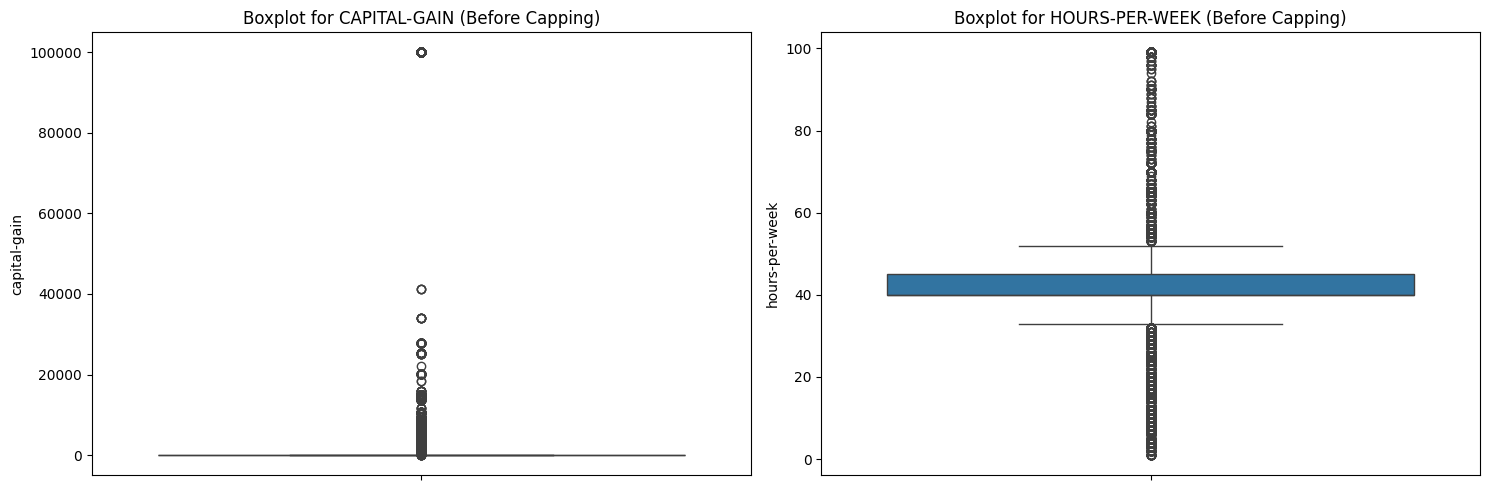

In [22]:
# Columns identified for visualization
outlier_cols = ['capital-gain', 'hours-per-week']

plt.figure(figsize=(15, 5))
for i, col in enumerate(outlier_cols):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(y=df_adult[col])
    plt.title(f'Boxplot for {col.upper()} (Before Capping)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**2. Implement IQR Capping Function**

* We define a function to calculate the upper and lower bounds using the 1.5×IQR rule. For most of these financial columns (where values are 0), we only need to worry about the upper cap.

In [23]:
def iqr_capper(df, col, factor=1.5):
    """Calculates IQR bounds and returns the upper limit for capping."""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + factor * IQR
    lower_bound = Q1 - factor * IQR

    # We will use the calculated upper bound for capping
    return upper_bound, lower_bound

# Columns to apply capping
cols_to_cap = ['capital-gain', 'capital-loss', 'fnlwgt', 'hours-per-week', 'age']
# 'age' is included for completeness, although its outliers are less extreme

**3. Apply Capping (Winsorization) to Numeric Features**

* We iterate through the identified columns and apply the capping strategy. This is a crucial step to preserve the high number of rows while mitigating the outlier's distorting effect.

In [24]:

for col in cols_to_cap:
    # Calculate bounds for the current column
    upper, lower = iqr_capper(df_adult, col)

    # Implement Capping using .loc for safe assignment
    # Values above the upper bound are replaced by the upper bound
    df_adult.loc[df_adult[col] > upper, col] = upper

    # Values below the lower bound are replaced by the lower bound (rare for these features)
    df_adult.loc[df_adult[col] < lower, col] = lower

    print(f"✅ Capped '{col}' at Upper Threshold: {upper:.2f}")

print("\nOutlier management complete.")

✅ Capped 'capital-gain' at Upper Threshold: 0.00
✅ Capped 'capital-loss' at Upper Threshold: 0.00
✅ Capped 'fnlwgt' at Upper Threshold: 417779.25
✅ Capped 'hours-per-week' at Upper Threshold: 52.50
✅ Capped 'age' at Upper Threshold: 78.00

Outlier management complete.


**4. Verification**

* We check the descriptive statistics again to confirm that the maximum values for the capped columns are now equal to the calculated upper threshold, successfully completing Step 2.

In [25]:
# Check the max row for the affected columns
print(df_adult[cols_to_cap].max())

# Optionally, re-run the boxplots to see the tighter distribution
# (Code omitted for brevity, but highly recommended in a live notebook)

capital-gain           0.00
capital-loss           0.00
fnlwgt            417779.25
hours-per-week        52.50
age                   78.00
dtype: float64


## Step 3. Handling Categorical Data 🏷️

* Find all the **categorical features** in the dataset.
* Convert them into **numeric form** so they can be used in models.
* Try both `pd.get_dummies()` and `OneHotEncoder`.
* Reflect: which method would you use in **production**, and why?

**1. Identify Categorical Features**

* First, let's identify all columns with the object data type, which represent our categorical features (including the target, income).

In [27]:
# Identify all columns with 'object' dtype (text/categorical)
categorical_cols = df_adult.select_dtypes(include='object').columns.tolist()

print(categorical_cols)

# Note: The 'income' column is our target variable (y).

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


 **2. Prepare the Target Variable (income)**

* The target variable must be converted to a binary numeric form (0 and 1) for classification.

In [28]:
# Convert the target variable 'income' to 0 and 1 (Binary Encoding)
# '<=50K' is typically the negative class (0), and '>50K' is the positive class (1).
df_adult['income'] = df_adult['income'].replace({'<=50K': 0, '>50K': 1})

print("\n✅ Target variable 'income' converted to numeric (0 and 1).")


✅ Target variable 'income' converted to numeric (0 and 1).


**3. Encoding Nominal Features (The Core Task)**

* We will now encode all remaining categorical features (excluding the target income). Since all these features (workclass, occupation, etc.) are Nominal (no inherent order), One-Hot Encoding is the appropriate method.

In [29]:
# List of features to be encoded (excluding the already handled 'income')
nominal_features = [col for col in categorical_cols if col != 'income']

# Applying pd.get_dummies()
df_dummies = pd.get_dummies(df_adult[nominal_features], drop_first=True)

print("\n--- Method A: pd.get_dummies() Output Shape ---")
print(f"Shape: {df_dummies.shape}")


--- Method A: pd.get_dummies() Output Shape ---
Shape: (48842, 97)


In [31]:
# 1. Initialize Encoder
# handle_unknown='ignore' prevents errors if unseen categories appear in the test set.
# sparse_output=False ensures a dense NumPy array output.
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# 2. Fit and Transform
# Note: X_train would typically be used for fitting, but here we fit on the full feature set.
encoded_array = encoder.fit_transform(df_adult[nominal_features])

# 3. Convert to DataFrame and Finalize
encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(nominal_features),
    index=df_adult.index # Align index for correct concatenation
)

# 4. Final Data Concatenation
# Drop the original text columns and concatenate the new encoded columns
df_adult.drop(columns=nominal_features, inplace=True)
df_adult = pd.concat([df_adult, encoded_df], axis=1)

print("✅ Final encoding with OneHotEncoder is complete.")
print(f"Final DataFrame shape: {df_adult.shape}")

✅ Final encoding with OneHotEncoder is complete.
Final DataFrame shape: (48842, 104)


## Step 4. Feature Scaling ⚖️

[Step 4: Feature Scaling ⚖- Github](https://github.com/hgabrali/Hands-on-Mini-Project-Feature-Preparation-on-the-Adult-Income-Dataset/blob/main/Step%204:%20Feature%20Scaling.md)

* Pick several **numeric features**.
* Apply different scaling methods (**Min-Max**, **Standardization**).
* Compare before and after.
* Which method do you think is most appropriate here?

**1. Identify Numeric Features to Scale**

*We select all integer and float columns, excluding the target variable (income).

In [33]:
# Identify all numeric columns (int64 and float64) excluding the target 'income'
numeric_cols = df_adult.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features_to_scale = [col for col in numeric_cols if col != 'income']

print(f"Numeric features identified for scaling: {numeric_features_to_scale}")

# Create separate DataFrames for each scaling method for easy comparison
df_scaled_standard = df_adult.copy()
df_scaled_minmax = df_adult.copy()

Numeric features identified for scaling: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Unknown', 'workclass_Without-pay', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming

**2. Apply Standardization (Z-Score Scaling)**

* This method scales the features such that they have a mean (μ) of 0 and a standard deviation (σ) of 1. It is robust, especially after outlier capping.

In [34]:
scaler_std = StandardScaler()

# Fit the scaler on the numeric features and transform them
df_scaled_standard.loc[:, numeric_features_to_scale] = scaler_std.fit_transform(
    df_scaled_standard[numeric_features_to_scale]
)

print("✅ Standardization complete. Sample of 'age' mean and std:")
print(f"Mean (Age): {df_scaled_standard['age'].mean():.4f}")
print(f"Std Dev (Age): {df_scaled_standard['age'].std():.4f}")

✅ Standardization complete. Sample of 'age' mean and std:
Mean (Age): 0.0000
Std Dev (Age): 1.0000


**3. Apply Min-Max Scaling**
* This method scales the features to a fixed range, typically [0, 1].

In [35]:
scaler_mm = MinMaxScaler()

# Fit the scaler on the numeric features and transform them
df_scaled_minmax.loc[:, numeric_features_to_scale] = scaler_mm.fit_transform(
    df_scaled_minmax[numeric_features_to_scale]
)

print("✅ Min-Max Scaling complete. Sample of 'age' min and max:")
print(f"Min (Age): {df_scaled_minmax['age'].min():.4f}")
print(f"Max (Age): {df_scaled_minmax['age'].max():.4f}")

✅ Min-Max Scaling complete. Sample of 'age' min and max:
Min (Age): 0.0000
Max (Age): 1.0000


**4. Visualize and Compare**

*Visualization helps us compare the distribution of a highly skewed feature (like capital-gain) under both methods.

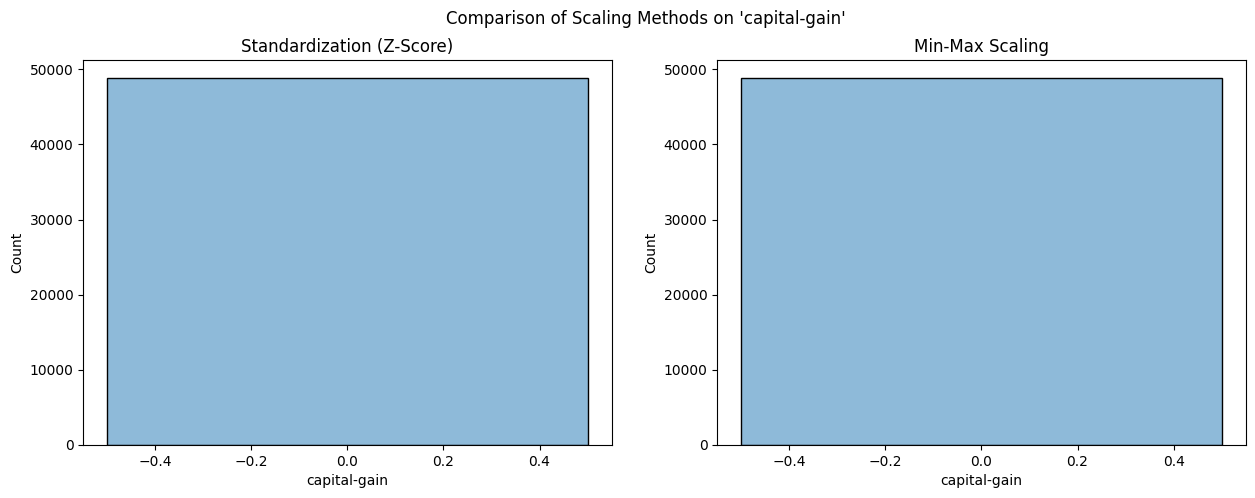

In [36]:
plt.figure(figsize=(15, 5))

# Plot 1: Standardized 'capital-gain'
plt.subplot(1, 2, 1)
sns.histplot(df_scaled_standard['capital-gain'], kde=True)
plt.title('Standardization (Z-Score)')

# Plot 2: Min-Max Scaled 'capital-gain'
plt.subplot(1, 2, 2)
sns.histplot(df_scaled_minmax['capital-gain'], kde=True)
plt.title('Min-Max Scaling')

plt.suptitle("Comparison of Scaling Methods on 'capital-gain'")
plt.show()

## Step 5. Feature Engineering ✨

[Step 5. Feature Engineering- Github](https://github.com/hgabrali/Hands-on-Mini-Project-Feature-Preparation-on-the-Adult-Income-Dataset/blob/main/Step%205:%20Feature%20Engineering.md)

* Create at least **two new features** that could help predict income.
* Think about combinations, transformations, or new groupings of existing variables.
* Explain your reasoning: why might these new features help?

### 1. Feature 1: Capital Activity Indicator (`Has_Capital_Activity`)

* **Rationale:** The original **`capital-gain`** and **`capital-loss`** columns are highly skewed (mostly zero). The most important signal is **whether or not** a person has any capital movement, regardless of the precise amount (since outliers were capped). This binary feature captures that signal cleanly.
* **Method:** Combine the two columns into a single binary (**0 or 1**) indicator.


In [37]:

# If capital-gain > 0 OR capital-loss > 0, set Has_Capital_Activity = 1, else 0.
df_adult.loc[:, 'Has_Capital_Activity'] = np.where(
    (df_adult['capital-gain'] > 0) | (df_adult['capital-loss'] > 0), 1, 0
)

print("✅ 'Has_Capital_Activity' (0/1) created.")

✅ 'Has_Capital_Activity' (0/1) created.


### 2. Feature 2: Work Intensity Group (`Work_Intensity`)

* **Rationale:** Income heavily depends on whether a person works **part-time, standard full-time, or overtime**. Binning the continuous **`hours-per-week`** feature into distinct intensity groups provides the model with a clear categorical signal of commitment.
* **Method:** Bin the **`hours-per-week`** column into three meaningful categorical levels.

In [38]:
# Define bin boundaries and labels
# Assuming: Part-Time (< 35), Full-Time (35-45), Overtime (> 45)
bins = [0, 35, 45, df_adult['hours-per-week'].max() + 1]
labels = ['PartTime', 'FullTime_Standard', 'Overtime']

print("\n--- 2. Creating 'Work_Intensity' Group ---")

# Use pd.cut to create the new categorical feature
df_adult.loc[:, 'Work_Intensity'] = pd.cut(
    df_adult['hours-per-week'],
    bins=bins,
    labels=labels,
    right=False, # Use right=False to include the left boundary (e.g., [35, 45) )
    include_lowest=True
).astype(str)

print("✅ 'Work_Intensity' categorical feature created.")


--- 2. Creating 'Work_Intensity' Group ---
✅ 'Work_Intensity' categorical feature created.


### Verification and Final Steps 🚀

After creating these new features, you must follow these final steps:

1.  **Encode the new categorical feature** (`Work_Intensity`) using **OneHotEncoder** (as done in Step 3).
2.  **Drop the original columns** (`capital-gain`, `capital-loss`, `hours-per-week`) that were replaced or used to create the engineered features.
3.  **Proceed to Step 6** (Model Evaluation and Final Summary).

In [39]:
# Example of encoding the new categorical feature (Work_Intensity)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_intensity = encoder.fit_transform(df_adult[['Work_Intensity']])
encoded_intensity_df = pd.DataFrame(
    encoded_intensity,
    columns=encoder.get_feature_names_out(['Work_Intensity']),
    index=df_adult.index
)

# Combine and drop
df_adult = pd.concat([df_adult, encoded_intensity_df], axis=1)
df_adult.drop(columns=['Work_Intensity'], inplace=True) # Drop the text version
print("\n✅ Work Intensity encoded and ready.")


✅ Work Intensity encoded and ready.
